In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
housing = data.copy()
test_housing = test_data.copy()

In [4]:
#原始資料235個features
housing.shape

(60000, 235)

In [5]:
housing.head(3)

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price
0,e3mMIMR3JJqCaXz1,8,21,18674,4,3,2,6271,2,NaN,...,58,1,157,1,2483,1,6011,1,34.469803,6.476038e+05
1,LgwzgklNvy4QCtq5,8,7,18800,5,1,2,7885,2,NaN,...,28,1,115,1,15872,1,32221,1,40.073573,3.321452e+06
2,ucIR2NLLsC3T650L,8,7,19289,4,1,2,6028,2,NaN,...,78,1,212,1,15760,1,32228,1,54.462081,9.570885e+06


# Feature engineering

In [6]:
#原為第I類別於該房屋方圓50公尺點位數，改為第I類別於該房屋方圓10公尺到50公尺的點位數，及差額
r = np.zeros([len(housing), 1])
a = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII', 'XIV']
b = [10000, 5000, 1000, 500, 250, 100, 50, 10]
newfeature1 = []
for i in a:
    for j in range(0, 7):
        c = housing[i + '_' + str(b[j])] - housing[i + '_' + str(b[j + 1])]
        r = pd.concat([pd.DataFrame(r), pd.DataFrame(c)], axis = 1)
        newfeature1.append(i + '_' + str(b[j + 1]) + '-' + str(b[j]))
r.columns = range(0, r.shape[1])
r = r.drop(0, axis = 1) 
r.head()

,1,2,3,4,5,6,7,8,9,10,...,89,90,91,92,93,94,95,96,97,98
0,380,340,39,15,4,1,0,1187,768,28,...,1,0,0,3528,2326,99,37,18,2,1
1,847,474,8,3,1,1,0,2613,1650,23,...,2,1,1,16349,15757,87,21,6,0,1
2,910,474,31,7,0,1,0,2864,1604,114,...,2,0,0,16468,15548,134,51,25,2,0
3,372,420,9,0,0,0,0,1056,976,24,...,0,0,0,4703,2443,105,18,1,1,0
4,358,47,1,0,0,0,0,917,112,1,...,0,0,0,4855,2540,29,16,2,0,0


In [7]:
#原為該房屋方圓500公尺內類別種類數，改成該房屋方圓50公尺到500公尺內類別種類數
a = [10000, 5000, 1000, 500, 50]
for i in range(0, 4):
        b = housing['N_' + str(a[i])] - housing['N_' + str(a[i + 1])]
        r = pd.concat([pd.DataFrame(r), pd.DataFrame(b)], axis = 1)
        newfeature1.append('N_' + str(a[i+1]) + '-' + str(a[i]))
r.columns = newfeature1
r.head()

,I_5000-10000,I_1000-5000,I_500-1000,I_250-500,I_100-250,I_50-100,I_10-50,II_5000-10000,II_1000-5000,II_500-1000,...,XIV_1000-5000,XIV_500-1000,XIV_250-500,XIV_100-250,XIV_50-100,XIV_10-50,N_5000-10000,N_1000-5000,N_500-1000,N_50-500
0,380,340,39,15,4,1,0,1187,768,28,...,2326,99,37,18,2,1,0,0,0,12
1,847,474,8,3,1,1,0,2613,1650,23,...,15757,87,21,6,0,1,0,0,2,7
2,910,474,31,7,0,1,0,2864,1604,114,...,15548,134,51,25,2,0,0,0,0,10
3,372,420,9,0,0,0,0,1056,976,24,...,2443,105,18,1,1,0,0,1,2,7
4,358,47,1,0,0,0,0,917,112,1,...,2540,29,16,2,0,0,0,5,5,3


In [8]:
housing['N_' + str(a[i])]

0        14
1        12
2        14
3        11
4         4
         ..
59995    11
59996    14
59997    13
59998    14
59999    14
Name: N_500, Length: 60000, dtype: int64

In [9]:
housing = pd.concat([housing, pd.DataFrame(r)],axis = 1)
housing.head()

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIV_1000-5000,XIV_500-1000,XIV_250-500,XIV_100-250,XIV_50-100,XIV_10-50,N_5000-10000,N_1000-5000,N_500-1000,N_50-500
0,e3mMIMR3JJqCaXz1,8,21,18674,4,3,2,6271,2,NaN,...,2326,99,37,18,2,1,0,0,0,12
1,LgwzgklNvy4QCtq5,8,7,18800,5,1,2,7885,2,NaN,...,15757,87,21,6,0,1,0,0,2,7
2,ucIR2NLLsC3T650L,8,7,19289,4,1,2,6028,2,NaN,...,15548,134,51,25,2,0,0,0,0,10
3,jre1pJhcQj91Kdky,8,21,20385,24,0,2,18325,0,NaN,...,2443,105,18,1,1,0,0,1,2,7
4,rQpYpY9nRG7X5mmr,1,21,20657,2,4,2,6880,2,NaN,...,2540,29,16,2,0,0,0,5,5,3


In [10]:
#加上點數量分隔的新features共337
print(235 + (7 * 14 + 4))
housing.shape

337


(60000, 337)

In [11]:
housing.columns[235:333]

Index(['I_5000-10000', 'I_1000-5000', 'I_500-1000', 'I_250-500', 'I_100-250',
       'I_50-100', 'I_10-50', 'II_5000-10000', 'II_1000-5000', 'II_500-1000',
       'II_250-500', 'II_100-250', 'II_50-100', 'II_10-50', 'III_5000-10000',
       'III_1000-5000', 'III_500-1000', 'III_250-500', 'III_100-250',
       'III_50-100', 'III_10-50', 'IV_5000-10000', 'IV_1000-5000',
       'IV_500-1000', 'IV_250-500', 'IV_100-250', 'IV_50-100', 'IV_10-50',
       'V_5000-10000', 'V_1000-5000', 'V_500-1000', 'V_250-500', 'V_100-250',
       'V_50-100', 'V_10-50', 'VI_5000-10000', 'VI_1000-5000', 'VI_500-1000',
       'VI_250-500', 'VI_100-250', 'VI_50-100', 'VI_10-50', 'VII_5000-10000',
       'VII_1000-5000', 'VII_500-1000', 'VII_250-500', 'VII_100-250',
       'VII_50-100', 'VII_10-50', 'VIII_5000-10000', 'VIII_1000-5000',
       'VIII_500-1000', 'VIII_250-500', 'VIII_100-250', 'VIII_50-100',
       'VIII_10-50', 'IX_5000-10000', 'IX_1000-5000', 'IX_500-1000',
       'IX_250-500', 'IX_100-250', 'IX_

In [12]:
#看一下而已，沒用到
index = housing.filter(regex = 'index', axis = 1)
index.head()

,I_index_50,I_index_500,I_index_1000,I_index_5000,I_index_10000,II_index_50,II_index_500,II_index_1000,II_index_5000,II_index_10000,...,XIII_index_50,XIII_index_500,XIII_index_1000,XIII_index_5000,XIII_index_10000,XIV_index_50,XIV_index_500,XIV_index_1000,XIV_index_5000,XIV_index_10000
0,0,1,1,1,1,0,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
1,0,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,0,1,1,1,1,0,1,1,1,1,...,0,1,1,1,1,0,1,1,1,1
3,0,0,1,1,1,0,1,1,1,1,...,0,0,0,1,1,0,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,...,0,0,0,1,1,0,1,1,1,1


In [13]:
b = np.zeros([len(housing), 1])

In [14]:
#原為該房屋方圓50公尺內有無I類別，改為該房屋方圓10公尺到50公尺內有無I類別
for j in range(235, 333, 7):
    c = []
    for i in range(housing.shape[0]):
        d = []
        if housing.iloc[i, j + 6] > 0:
            d.append(1)
        else:
            d.append(0)
        if housing.iloc[i, j + 5] > 0 or housing.iloc[i, j + 4] > 0 or housing.iloc[i, j + 3] > 0:
            d.append(1)
        else:
            d.append(0)
        if housing.iloc[i, j + 2] > 0:
            d.append(1)
        else:
            d.append(0)            
        if housing.iloc[i, j + 1] > 0:
            d.append(1)
        else:
            d.append(0)            
        if housing.iloc[i, j] > 0:
            d.append(1)
        else:
            d.append(0)
        c.append(d)
    b = pd.concat([pd.DataFrame(b), pd.DataFrame(c)], axis=1)
b.columns = range(0, b.shape[1])
b = b.drop(0, axis = 1)
b.columns = range(0, b.shape[1])
b.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0,1,1,1,1,0,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
1,0,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,0,1,1,1,1,0,1,1,1,1,...,0,1,1,1,1,0,1,1,1,1
3,0,0,1,1,1,0,1,1,1,1,...,0,0,0,1,1,0,1,1,1,1
4,0,0,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,1,1,1,1


In [15]:
#命名分類切割的columns
a = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII', 'XIV']
c = [0, 50, 500, 1000, 5000, 10000]
newfeature2 = []
for i in a:
    for j in range(0, 5):
        newfeature2.append(i + '_index_'+ str(c[j]) +'-'+ str(c[j + 1]))
b.columns = newfeature2
b.head()

,I_index_0-50,I_index_50-500,I_index_500-1000,I_index_1000-5000,I_index_5000-10000,II_index_0-50,II_index_50-500,II_index_500-1000,II_index_1000-5000,II_index_5000-10000,...,XIII_index_0-50,XIII_index_50-500,XIII_index_500-1000,XIII_index_1000-5000,XIII_index_5000-10000,XIV_index_0-50,XIV_index_50-500,XIV_index_500-1000,XIV_index_1000-5000,XIV_index_5000-10000
0,0,1,1,1,1,0,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
1,0,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,0,1,1,1,1,0,1,1,1,1,...,0,1,1,1,1,0,1,1,1,1
3,0,0,1,1,1,0,1,1,1,1,...,0,0,0,1,1,0,1,1,1,1
4,0,0,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,1,1,1,1


In [16]:
housing = pd.concat([housing, b], axis = 1)
housing.head()

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIII_index_0-50,XIII_index_50-500,XIII_index_500-1000,XIII_index_1000-5000,XIII_index_5000-10000,XIV_index_0-50,XIV_index_50-500,XIV_index_500-1000,XIV_index_1000-5000,XIV_index_5000-10000
0,e3mMIMR3JJqCaXz1,8,21,18674,4,3,2,6271,2,NaN,...,0,1,1,1,1,1,1,1,1,1
1,LgwzgklNvy4QCtq5,8,7,18800,5,1,2,7885,2,NaN,...,1,1,1,1,1,1,1,1,1,1
2,ucIR2NLLsC3T650L,8,7,19289,4,1,2,6028,2,NaN,...,0,1,1,1,1,0,1,1,1,1
3,jre1pJhcQj91Kdky,8,21,20385,24,0,2,18325,0,NaN,...,0,0,0,1,1,0,1,1,1,1
4,rQpYpY9nRG7X5mmr,1,21,20657,2,4,2,6880,2,NaN,...,0,0,0,1,1,0,1,1,1,1


In [17]:
#加上分類分隔的新features共407
print(235+102+70)
housing.shape

407


(60000, 407)

In [18]:
#刪掉原先點數量資料
a = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII', 'XIV']
b = [10000, 5000, 1000, 500, 250, 100, 50, 10]
for i in a:
    for j in range(0, 8):
        housing = housing.drop(i + '_' + str(b[j]), axis = 1)
c = [10000, 5000, 1000, 500, 50]
for i in range(0, 5):
        housing = housing.drop('N_' + str(c[i]), axis = 1)
housing.head()

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIII_index_0-50,XIII_index_50-500,XIII_index_500-1000,XIII_index_1000-5000,XIII_index_5000-10000,XIV_index_0-50,XIV_index_50-500,XIV_index_500-1000,XIV_index_1000-5000,XIV_index_5000-10000
0,e3mMIMR3JJqCaXz1,8,21,18674,4,3,2,6271,2,NaN,...,0,1,1,1,1,1,1,1,1,1
1,LgwzgklNvy4QCtq5,8,7,18800,5,1,2,7885,2,NaN,...,1,1,1,1,1,1,1,1,1,1
2,ucIR2NLLsC3T650L,8,7,19289,4,1,2,6028,2,NaN,...,0,1,1,1,1,0,1,1,1,1
3,jre1pJhcQj91Kdky,8,21,20385,24,0,2,18325,0,NaN,...,0,0,0,1,1,0,1,1,1,1
4,rQpYpY9nRG7X5mmr,1,21,20657,2,4,2,6880,2,NaN,...,0,0,0,1,1,0,1,1,1,1


In [19]:
#刪掉原先分類資料
a = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII', 'XIV']
b = [50, 500, 1000, 5000, 10000]
for i in a:
    for j in range(0, 5):
        housing = housing.drop(i + '_index_' + str(b[j]), axis = 1)
housing.head()

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIII_index_0-50,XIII_index_50-500,XIII_index_500-1000,XIII_index_1000-5000,XIII_index_5000-10000,XIV_index_0-50,XIV_index_50-500,XIV_index_500-1000,XIV_index_1000-5000,XIV_index_5000-10000
0,e3mMIMR3JJqCaXz1,8,21,18674,4,3,2,6271,2,NaN,...,0,1,1,1,1,1,1,1,1,1
1,LgwzgklNvy4QCtq5,8,7,18800,5,1,2,7885,2,NaN,...,1,1,1,1,1,1,1,1,1,1
2,ucIR2NLLsC3T650L,8,7,19289,4,1,2,6028,2,NaN,...,0,1,1,1,1,0,1,1,1,1
3,jre1pJhcQj91Kdky,8,21,20385,24,0,2,18325,0,NaN,...,0,0,0,1,1,0,1,1,1,1
4,rQpYpY9nRG7X5mmr,1,21,20657,2,4,2,6880,2,NaN,...,0,0,0,1,1,0,1,1,1,1


# 刪除id資料

In [20]:
housing = housing.drop(['building_id', 'parking_area', 'town', 'village','village_income_median'], axis=1)
housing.head()

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_price,txn_floor,...,XIII_index_0-50,XIII_index_50-500,XIII_index_500-1000,XIII_index_1000-5000,XIII_index_5000-10000,XIV_index_0-50,XIV_index_50-500,XIV_index_500-1000,XIV_index_1000-5000,XIV_index_5000-10000
0,8,21,18674,4,3,2,6271,2,NaN,3.0,...,0,1,1,1,1,1,1,1,1,1
1,8,7,18800,5,1,2,7885,2,NaN,5.0,...,1,1,1,1,1,1,1,1,1,1
2,8,7,19289,4,1,2,6028,2,NaN,1.0,...,0,1,1,1,1,0,1,1,1,1
3,8,21,20385,24,0,2,18325,0,81138.88976,13.0,...,0,0,0,1,1,0,1,1,1,1
4,1,21,20657,2,4,2,6880,2,NaN,NaN,...,0,0,0,1,1,0,1,1,1,1


In [21]:
for i in range(0,len(housing)):
    if housing.iloc[i,7] == 2:
        housing.iloc[i,8] = 0

In [22]:
d = []
for i in range(0,len(housing)):
    if housing.iloc[i,9] == 28:
        d.append(i)
housing = housing.drop(d)

In [23]:
housing = housing.reset_index(drop=True)

In [24]:
housing["txn_floor"].fillna(2, inplace = True)
housing.head()

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_price,txn_floor,...,XIII_index_0-50,XIII_index_50-500,XIII_index_500-1000,XIII_index_1000-5000,XIII_index_5000-10000,XIV_index_0-50,XIV_index_50-500,XIV_index_500-1000,XIV_index_1000-5000,XIV_index_5000-10000
0,8,21,18674,4,3,2,6271,2,0.00000,3.0,...,0,1,1,1,1,1,1,1,1,1
1,8,7,18800,5,1,2,7885,2,0.00000,5.0,...,1,1,1,1,1,1,1,1,1,1
2,8,7,19289,4,1,2,6028,2,0.00000,1.0,...,0,1,1,1,1,0,1,1,1,1
3,8,21,20385,24,0,2,18325,0,81138.88976,13.0,...,0,0,0,1,1,0,1,1,1,1
4,1,21,20657,2,4,2,6880,2,0.00000,2.0,...,0,0,0,1,1,0,1,1,1,1


In [25]:
d = []
for i in range(0,len(housing)):
    if housing.iloc[i,0] == 5:
        d.append(i)
housing = housing.drop(d)

In [26]:
housing = housing.reset_index(drop=True)
housing.head()

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_price,txn_floor,...,XIII_index_0-50,XIII_index_50-500,XIII_index_500-1000,XIII_index_1000-5000,XIII_index_5000-10000,XIV_index_0-50,XIV_index_50-500,XIV_index_500-1000,XIV_index_1000-5000,XIV_index_5000-10000
0,8,21,18674,4,3,2,6271,2,0.00000,3.0,...,0,1,1,1,1,1,1,1,1,1
1,8,7,18800,5,1,2,7885,2,0.00000,5.0,...,1,1,1,1,1,1,1,1,1,1
2,8,7,19289,4,1,2,6028,2,0.00000,1.0,...,0,1,1,1,1,0,1,1,1,1
3,8,21,20385,24,0,2,18325,0,81138.88976,13.0,...,0,0,0,1,1,0,1,1,1,1
4,1,21,20657,2,4,2,6880,2,0.00000,2.0,...,0,0,0,1,1,0,1,1,1,1


In [27]:
housing[housing.isnull().any(axis=1)].head()

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_price,txn_floor,...,XIII_index_0-50,XIII_index_50-500,XIII_index_500-1000,XIII_index_1000-5000,XIII_index_5000-10000,XIV_index_0-50,XIV_index_50-500,XIV_index_500-1000,XIV_index_1000-5000,XIV_index_5000-10000


In [28]:
X_train = housing.drop('total_price', axis = 1)
Y_train = housing['total_price']

In [29]:
X_train.shape

(59996, 214)

# Feature selection

In [30]:
#drop constant feature
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0)
sel.fit(X_train)

VarianceThreshold(threshold=0)

In [31]:
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))
constant_feature = [x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]
constant_feature

4


['I_index_1000-5000',
 'VII_index_1000-5000',
 'XII_index_1000-5000',
 'XIV_index_1000-5000']

In [32]:
X_train = X_train.drop(constant_feature, axis = 1)
X_train.shape

(59996, 210)

In [33]:
#drop quasi-constant feature
sel = VarianceThreshold(threshold=0.01)
sel.fit(X_train)

VarianceThreshold(threshold=0.01)

In [34]:
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

quasi_constant_feature = [x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]
quasi_constant_feature

34


['doc_rate',
 'master_rate',
 'bachelor_rate',
 'jobschool_rate',
 'highschool_rate',
 'junior_rate',
 'elementary_rate',
 'I_index_5000-10000',
 'II_index_1000-5000',
 'II_index_5000-10000',
 'III_index_1000-5000',
 'III_index_5000-10000',
 'IV_index_1000-5000',
 'IV_index_5000-10000',
 'V_index_1000-5000',
 'V_index_5000-10000',
 'VI_index_1000-5000',
 'VI_index_5000-10000',
 'VII_index_500-1000',
 'VII_index_5000-10000',
 'VIII_index_1000-5000',
 'VIII_index_5000-10000',
 'IX_index_1000-5000',
 'IX_index_5000-10000',
 'X_index_1000-5000',
 'X_index_5000-10000',
 'XI_index_1000-5000',
 'XI_index_5000-10000',
 'XII_index_50-500',
 'XII_index_500-1000',
 'XII_index_5000-10000',
 'XIV_index_50-500',
 'XIV_index_500-1000',
 'XIV_index_5000-10000']

In [35]:
X_train = X_train.drop(quasi_constant_feature, axis = 1)
X_train.shape

(59996, 176)

#### no duplicated feature

#### drop correlation feature (效果不好)

#### 做f_regression drop P-value (效果不好)

# Feature engineering

c:\Users\Julie\Documents\Python\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


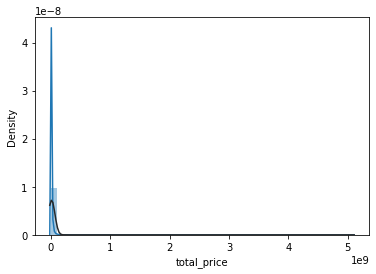

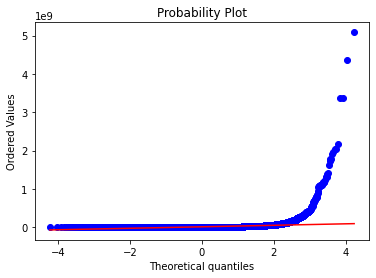

In [36]:
#y不為常態分配
import seaborn as sns
from scipy.stats import norm
from scipy import stats

sns.distplot(Y_train, fit=norm)
fig = plt.figure()
res = stats.probplot(Y_train, plot=plt)

In [37]:
#y做log1p
Y_train = np.log1p(Y_train)

c:\Users\Julie\Documents\Python\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


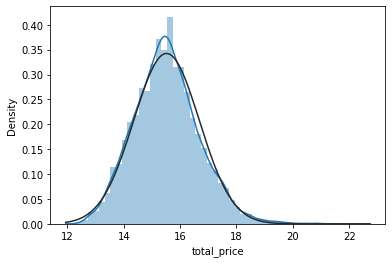

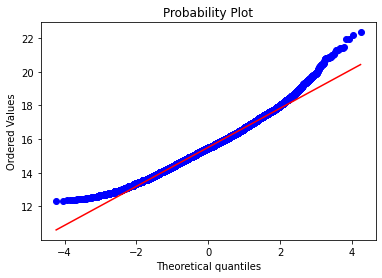

In [38]:
sns.distplot(Y_train, fit=norm);
fig = plt.figure()
res = stats.probplot(Y_train, plot=plt)

In [39]:
#讓lat全部為正
X_train['lat'] = X_train['lat'] - min(X_train['lat'])

In [40]:
# 偏態的column
from scipy.stats import norm, skew

numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index
skewed_feats = X_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
print(len(skewness))
skewness.head(10)

176


,Skew
building_area,83.710659
land_area,43.668936
XIII_10-50,17.728199
XIII_50-100,16.334050
VIII_10-50,11.528995
XIII_100-250,11.008367
IV_10-50,10.556355
XIV_10-50,10.011546
N_5000-10000,10.010939
XIV_50-100,9.179134


In [41]:
#偏態轉換
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p, inv_boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    X_train[feat] = boxcox1p(X_train[feat], lam)

There are 176 skewed numerical features to Box Cox transform


In [42]:
X_train.head()

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_price,txn_floor,...,XI_index_0-50,XI_index_50-500,XI_index_500-1000,XII_index_0-50,XIII_index_0-50,XIII_index_50-500,XIII_index_500-1000,XIII_index_1000-5000,XIII_index_5000-10000,XIV_index_0-50
0,2.602594,3.932510,22.480600,1.820334,1.540963,1.194318,18.080168,1.194318,0.000000,1.540963,...,0.0,0.730463,0.730463,0.000000,0.000000,0.730463,0.730463,0.730463,0.730463,0.730463
1,2.602594,2.440268,22.510014,2.055642,0.730463,1.194318,18.944966,1.194318,0.000000,2.055642,...,0.0,0.730463,0.730463,0.730463,0.730463,0.730463,0.730463,0.730463,0.730463,0.730463
2,2.602594,2.440268,22.622605,1.820334,0.730463,1.194318,17.933924,1.194318,0.000000,0.730463,...,0.0,0.730463,0.730463,0.730463,0.000000,0.730463,0.730463,0.730463,0.730463,0.000000
3,2.602594,3.932510,22.866400,4.137711,0.000000,1.194318,22.398237,0.000000,29.665718,3.237728,...,0.0,0.730463,0.730463,0.730463,0.000000,0.000000,0.000000,0.730463,0.730463,0.000000
4,0.730463,3.932510,22.925174,1.194318,1.820334,1.194318,18.426558,1.194318,0.000000,1.194318,...,0.0,0.000000,0.730463,0.000000,0.000000,0.000000,0.000000,0.730463,0.730463,0.000000


# Modeling

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)

In [44]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [45]:
from sklearn.metrics import mean_squared_error

y_pred = xgb_reg.predict(x_test)
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_rmse = np.sqrt(xgb_mse)
print(xgb_rmse)

0.247577946195636


# Submit data

In [ ]:
#點數量隔開
r = np.zeros([len(test_housing), 1])
a = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII', 'XIV']
b = [10000, 5000, 1000, 500, 250, 100, 50, 10]
newfeature1 = []
for i in a:
    for j in range(0, 7):
        c = test_housing[i + '_' + str(b[j])] - test_housing[i + '_' + str(b[j + 1])]
        r = pd.concat([pd.DataFrame(r), pd.DataFrame(c)], axis = 1)
        newfeature1.append(i + '_' + str(b[j + 1]) + '-' + str(b[j]))
r.columns = range(0, r.shape[1])
r = r.drop(0, axis = 1) 
r.head()

In [ ]:
#點數量隔開
a = [10000, 5000, 1000, 500, 50]
for i in range(0, 4):
        b = test_housing['N_' + str(a[i])] - test_housing['N_' + str(a[i + 1])]
        r = pd.concat([pd.DataFrame(r), pd.DataFrame(b)], axis = 1)
        newfeature1.append('N_' + str(a[i+1]) + '-' + str(a[i]))
r.columns = newfeature1
r.head()

In [ ]:
test_housing = pd.concat([test_housing, pd.DataFrame(r)],axis = 1)
test_housing.head()

In [ ]:
#加上點數量分隔的新features共336
print(234 + (7 * 14 + 4))
test_housing.shape

In [ ]:
test_housing.columns[234:332]

In [ ]:
index = test_housing.filter(regex = 'index', axis = 1)
index.head()

In [ ]:
b = np.zeros([len(test_housing), 1])

In [ ]:
#分類分隔
for j in range(234, 332, 7):
    c = []
    for i in range(test_housing.shape[0]):
        d = []
        if test_housing.iloc[i, j + 6] > 0:
            d.append(1)
        else:
            d.append(0)
        if test_housing.iloc[i, j + 5] > 0 or test_housing.iloc[i, j + 4] > 0 or test_housing.iloc[i, j + 3] > 0:
            d.append(1)
        else:
            d.append(0)
        if test_housing.iloc[i, j + 2] > 0:
            d.append(1)
        else:
            d.append(0)            
        if test_housing.iloc[i, j + 1] > 0:
            d.append(1)
        else:
            d.append(0)            
        if test_housing.iloc[i, j] > 0:
            d.append(1)
        else:
            d.append(0)
        c.append(d)
    b = pd.concat([pd.DataFrame(b), pd.DataFrame(c)], axis=1)
b.columns = range(0, b.shape[1])
b = b.drop(0, axis = 1)
b.columns = range(0, b.shape[1])
b.head()

In [ ]:
a = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII', 'XIV']
c = [0, 50, 500, 1000, 5000, 10000]
newfeature2 = []
for i in a:
    for j in range(0, 5):
        newfeature2.append(i + '_index_'+ str(c[j]) +'-'+ str(c[j + 1]))
b.columns = newfeature2
b.head()

In [ ]:
test_housing = pd.concat([test_housing, b], axis = 1)
test_housing.head()

In [ ]:
#加上分類分隔的新features共406
print(234+102+70)
test_housing.shape

In [ ]:
#刪掉原先點數量資料
a = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII', 'XIV']
b = [10000, 5000, 1000, 500, 250, 100, 50, 10]
for i in a:
    for j in range(0, 8):
        test_housing = test_housing.drop(i + '_' + str(b[j]), axis = 1)
c = [10000, 5000, 1000, 500, 50]
for i in range(0, 5):
        test_housing = test_housing.drop('N_' + str(c[i]), axis = 1)
test_housing.head()

In [ ]:
#刪掉原先分類資料
a = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII', 'XIV']
b = [50, 500, 1000, 5000, 10000]
for i in a:
    for j in range(0, 5):
        test_housing = test_housing.drop(i + '_index_' + str(b[j]), axis = 1)
test_housing.head()

In [ ]:
test_housing = test_housing.drop(['building_id', 'parking_area', 'town', 'village','village_income_median'], axis=1)
test_housing.head()

In [ ]:
for i in range(0,len(test_housing)):
    if test_housing.iloc[i,7] == 2:
        test_housing.iloc[i,8] = 0

In [ ]:
test_housing["txn_floor"].fillna(2, inplace = True)
test_housing.head()

In [ ]:
test_housing[test_housing.isnull().any(axis=1)].head()

In [ ]:
X_test = test_housing

In [ ]:
X_test.shape

In [ ]:
X_test = X_test.drop(constant_feature, axis = 1)
X_test.shape

In [ ]:
X_test = X_test.drop(quasi_constant_feature, axis = 1)
X_test.shape

In [ ]:
X_test['lat'] = X_test['lat'] - min(X_test['lat'])

In [ ]:
for feat in skewed_features:
    X_test[feat] = boxcox1p(X_test[feat], lam)

In [ ]:
y_test_pred = np.expm1(xgb_reg.predict(X_test))

In [ ]:
a = test_data["building_id"]
b = pd.concat([a, pd.DataFrame(y_test_pred)], axis=1)
b.columns = ['building_id', 'total_price']
b.head()

In [ ]:
T = []
for i in range(0, len(b)):
    t = []
    for j in range(0, b.shape[1]):
        t.append(b.iloc[i, j])
    T.append(t)

In [ ]:
import csv

with open('submit_1.csv', 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(['building_id', 'total_price'])
    writer.writerows(T)